## Random walkers

In [1]:
rand()  # in interval [0, 1)

0.7999209776529597

In [14]:
function jump()
    r = round(rand()) 
    
    if r == 0.0
        r = -1.0
    end
    
    return r
end

jump (generic function with 1 method)

In [34]:
jump()

-1.0

In [11]:
r = 0

0

In [12]:
!r

MethodError: MethodError: no method matching !(::Int64)
Closest candidates are:
  !(!Matched::Missing) at missing.jl:100
  !(!Matched::Bool) at bool.jl:35
  !(!Matched::Function) at operators.jl:894

In [36]:
rand(0, 1)

0×1 Array{Float64,2}

In [41]:
rand(Int32, 1)

1-element Array{Int32,1}:
 -1961312063

In [42]:
rand(Bool)

true

In [49]:
r = (rand(Bool) * 2) - 1

1

## Walk function

In [61]:
"""
Calculate **positions** of simple random walk in 1D...

"""
function walk(N)
    x = 0 # initial position positions = [x] # store the positions
    positions = [x]
        
    for i in 1:N
        x += jump()
        push!(positions, x)
    end
    
    return positions 
end

walk

In [62]:
?walk

search: walk walkdir showable iswritable



Calculate **positions** of simple random walk in 1D...


In [63]:
positions = walk(100)

101-element Array{Int64,1}:
   0
   1
   2
   1
   2
   1
   0
  -1
  -2
  -3
  -2
  -3
  -4
   ⋮
  -9
 -10
 -11
 -12
 -11
 -10
  -9
 -10
  -9
  -8
  -9
  -8

In [65]:
using Plots

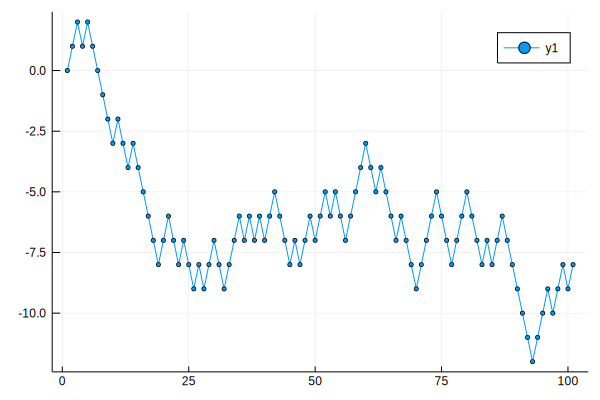

In [68]:
plot(positions, m=:2)

In [72]:
p = plot(leg=false)

for i in 1:100
    positions = walk(100)
    plot!(positions, m=:2, alpha=0.5)
end

p

In [74]:
T = 10
N = 100
walkers = [walk(T) for i in 1:N]


100-element Array{Array{Int64,1},1}:
 [0, 1, 0, -1, 0, -1, -2, -3, -4, -5, -6]  
 [0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 4]         
 [0, 1, 2, 1, 2, 3, 4, 3, 2, 3, 2]         
 [0, -1, 0, 1, 2, 1, 0, -1, -2, -3, -4]    
 [0, 1, 0, 1, 2, 3, 2, 1, 2, 3, 2]         
 [0, 1, 2, 3, 4, 3, 4, 3, 2, 3, 4]         
 [0, -1, 0, -1, -2, -3, -2, -3, -4, -3, -2]
 [0, 1, 2, 3, 4, 3, 4, 3, 2, 1, 0]         
 [0, -1, 0, 1, 0, 1, 0, -1, -2, -3, -4]    
 [0, 1, 2, 1, 0, -1, 0, 1, 0, -1, 0]       
 [0, 1, 2, 1, 0, -1, 0, 1, 0, -1, -2]      
 [0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0]    
 [0, 1, 0, -1, 0, -1, -2, -1, -2, -3, -2]  
 ⋮                                         
 [0, -1, 0, 1, 0, 1, 0, 1, 2, 1, 0]        
 [0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 2]         
 [0, 1, 2, 1, 0, -1, -2, -3, -2, -3, -2]   
 [0, 1, 2, 1, 0, -1, 0, 1, 2, 1, 2]        
 [0, -1, 0, 1, 0, 1, 0, -1, 0, -1, 0]      
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8]         
 [0, -1, -2, -3, -2, -1, -2, -3, -2, -1, 0]
 [0, 1, 2, 3, 4, 5, 6, 5, 4, 5, 4]     

In [77]:
hcat(walkers...)'

100×11 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 0   1   0  -1   0  -1  -2  -3  -4  -5  -6
 0   1   2   3   2   1   2   3   4   3   4
 0   1   2   1   2   3   4   3   2   3   2
 0  -1   0   1   2   1   0  -1  -2  -3  -4
 0   1   0   1   2   3   2   1   2   3   2
 0   1   2   3   4   3   4   3   2   3   4
 0  -1   0  -1  -2  -3  -2  -3  -4  -3  -2
 0   1   2   3   4   3   4   3   2   1   0
 0  -1   0   1   0   1   0  -1  -2  -3  -4
 0   1   2   1   0  -1   0   1   0  -1   0
 0   1   2   1   0  -1   0   1   0  -1  -2
 0  -1   0  -1   0  -1   0  -1   0  -1   0
 0   1   0  -1   0  -1  -2  -1  -2  -3  -2
 ⋮                   ⋮                   ⋮
 0  -1   0   1   0   1   0   1   2   1   0
 0   1   2   1   2   1   0   1   2   3   2
 0   1   2   1   0  -1  -2  -3  -2  -3  -2
 0   1   2   1   0  -1   0   1   2   1   2
 0  -1   0   1   0   1   0  -1   0  -1   0
 0   1   2   3   4   5   6   7   8   7   8
 0  -1  -2  -3  -2  -1  -2  -3  -2  -1   0
 0   1   2   3   4   5   6   5   4   5   4
 0

In [81]:
M = reduce(hcat, walkers)'   # ' is transpose

100×11 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 0   1   0  -1   0  -1  -2  -3  -4  -5  -6
 0   1   2   3   2   1   2   3   4   3   4
 0   1   2   1   2   3   4   3   2   3   2
 0  -1   0   1   2   1   0  -1  -2  -3  -4
 0   1   0   1   2   3   2   1   2   3   2
 0   1   2   3   4   3   4   3   2   3   4
 0  -1   0  -1  -2  -3  -2  -3  -4  -3  -2
 0   1   2   3   4   3   4   3   2   1   0
 0  -1   0   1   0   1   0  -1  -2  -3  -4
 0   1   2   1   0  -1   0   1   0  -1   0
 0   1   2   1   0  -1   0   1   0  -1  -2
 0  -1   0  -1   0  -1   0  -1   0  -1   0
 0   1   0  -1   0  -1  -2  -1  -2  -3  -2
 ⋮                   ⋮                   ⋮
 0  -1   0   1   0   1   0   1   2   1   0
 0   1   2   1   2   1   0   1   2   3   2
 0   1   2   1   0  -1  -2  -3  -2  -3  -2
 0   1   2   1   0  -1   0   1   2   1   2
 0  -1   0   1   0   1   0  -1   0  -1   0
 0   1   2   3   4   5   6   7   8   7   8
 0  -1  -2  -3  -2  -1  -2  -3  -2  -1   0
 0   1   2   3   4   5   6   5   4   5   4
 0

Extract 5th column of M:

In [84]:
M[1:2, 3:4]

2×2 Array{Int64,2}:
 0  -1
 2   3

In [87]:
at_step_5 = M[:, 5]   # M[1:end, 5]

100-element Array{Int64,1}:
  0
  2
  2
  2
  2
  4
 -2
  4
  0
  0
  0
  0
  0
  ⋮
  0
  2
  0
  0
  0
  4
 -2
  4
  0
  4
  2
  2

In [88]:
M = [i + j for i in 1:5, j in 1:6]

5×6 Array{Int64,2}:
 2  3  4  5   6   7
 3  4  5  6   7   8
 4  5  6  7   8   9
 5  6  7  8   9  10
 6  7  8  9  10  11

If have a vector of walkers, how update all positions?

In [89]:
walkers = zeros(100)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [90]:
jump()

-1.0

In [91]:
walkers[1] += jump()

1.0

100-element Array{Float64,1}:
 2.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [ ]:
jump!()

In [ ]:
function walk(jump, N)
    x = 0 # initial position positions = [x] # store the positions
    positions = [x]
        
    for i in 1:N
        x += jump()
        push!(positions, x)
    end
    
    return positions 
end